In [1]:
import pandas as pd

df = pd.read_csv("data/datasets2025/historical_metering_data_IT.csv", parse_dates=["DATETIME"])
df.set_index("DATETIME", inplace=True)

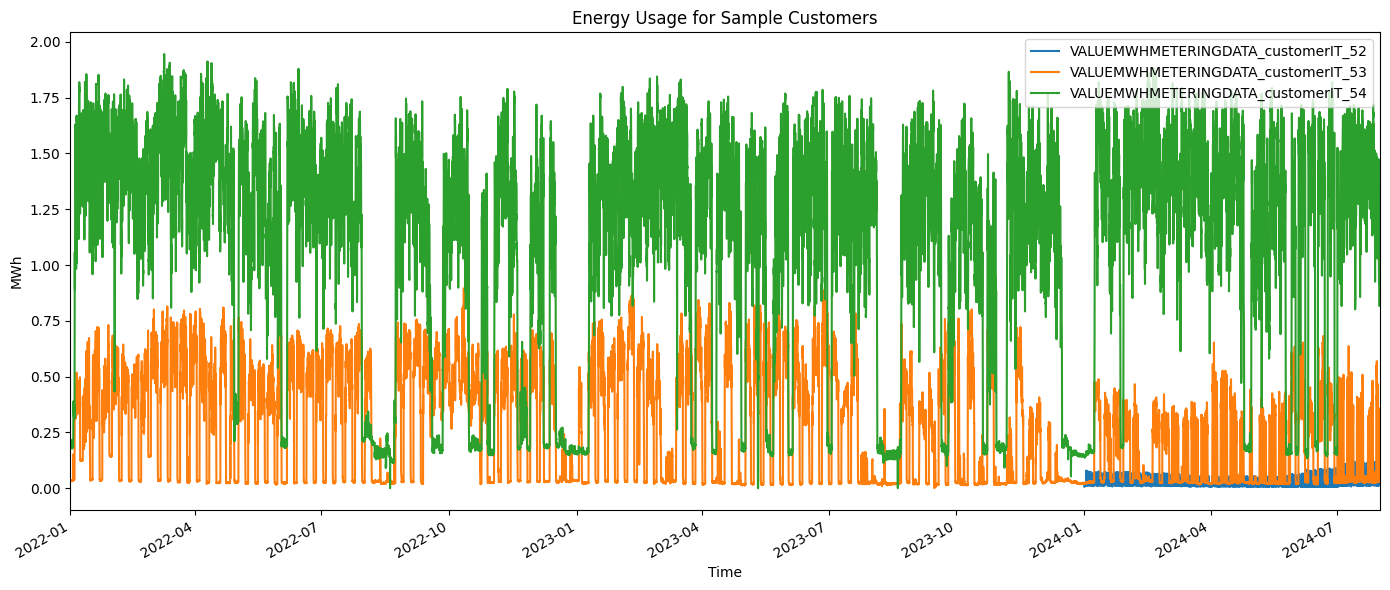

In [16]:
import matplotlib.pyplot as plt
import random

# Choose a few customer columns randomly
sample_columns = random.sample(list(df.columns), 6)
sample_columns = list(df.columns)[35:38]

# Plot
df[sample_columns].plot(figsize=(14, 6))
plt.title("Energy Usage for Sample Customers")
plt.ylabel("MWh")
plt.xlim(df.index[0], df.index[-1])
plt.xlabel("Time")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


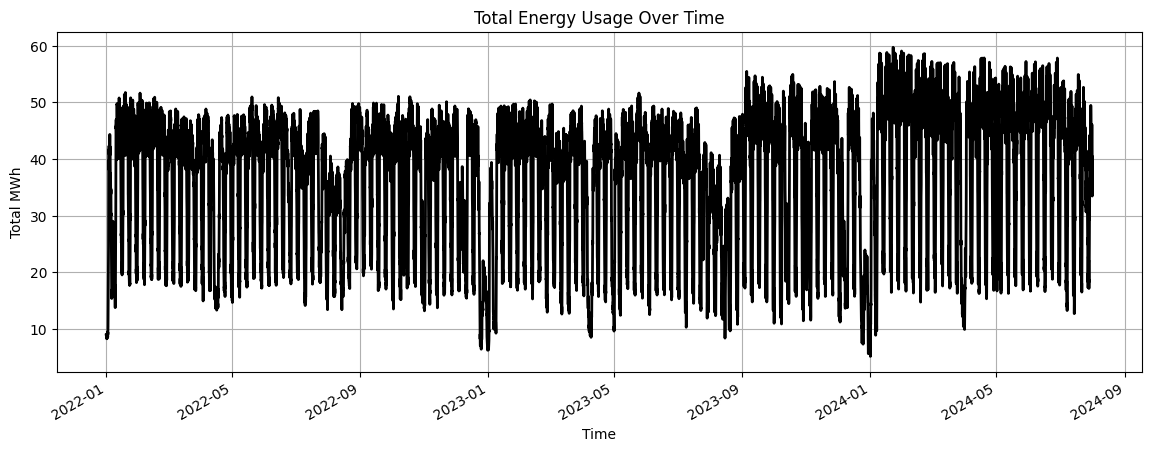

In [3]:
df["TOTAL_USAGE"] = df.sum(axis=1)
df["TOTAL_USAGE"].plot(figsize=(14, 5), color="black", lw=2)
plt.title("Total Energy Usage Over Time")
plt.ylabel("Total MWh")
plt.xlabel("Time")
plt.grid(True)
plt.show()


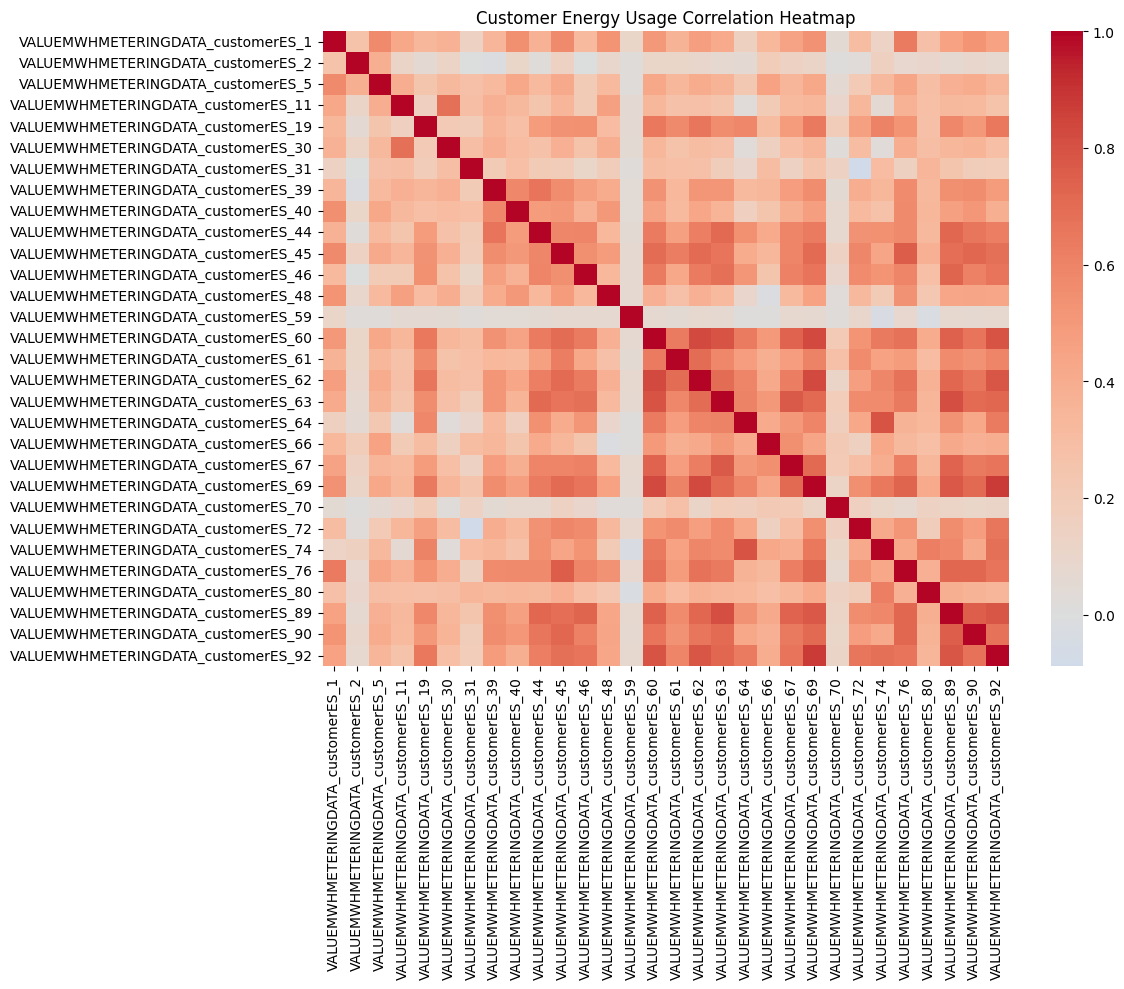

In [5]:
import seaborn as sns

# Compute correlation (optional: use subset to avoid overcrowding)
subset_df = df.iloc[:, :30]  # Just the first 30 columns for visualization
corr = subset_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Customer Energy Usage Correlation Heatmap")
plt.tight_layout()
plt.show()


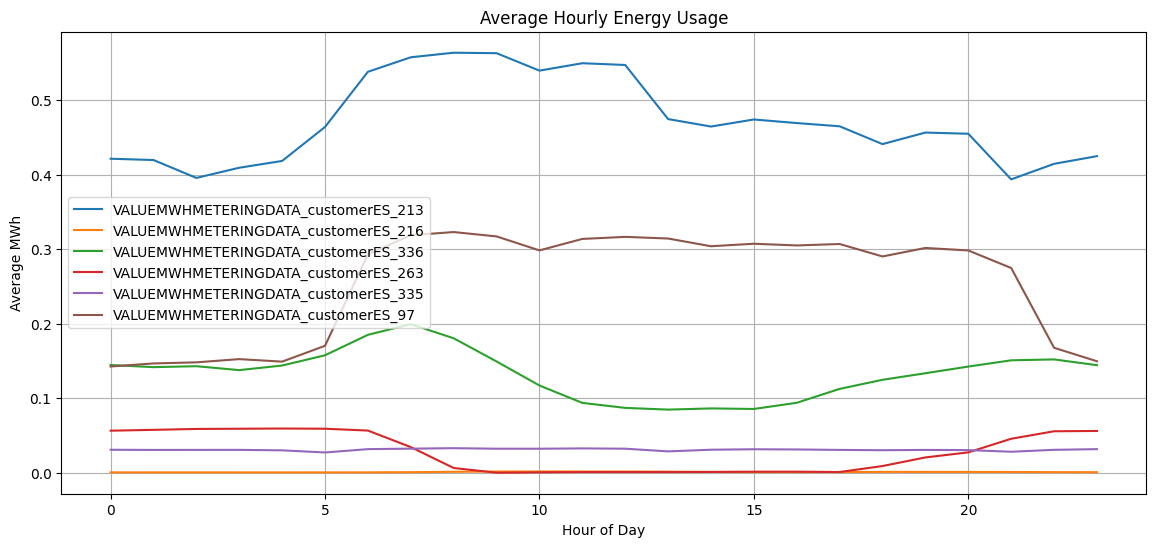

In [6]:
df["hour"] = df.index.hour
hourly_avg = df.groupby("hour").mean()

# Plot average hourly usage for a few customers
hourly_avg[sample_columns].plot(figsize=(14, 6))
plt.title("Average Hourly Energy Usage")
plt.xlabel("Hour of Day")
plt.ylabel("Average MWh")
plt.grid(True)
plt.show()


In [7]:
# Compute the correlation matrix (excluding the datetime index)
correlation_matrix = df.corr()

# Display top few rows
print(correlation_matrix.head())

                                    VALUEMWHMETERINGDATA_customerES_1  \
VALUEMWHMETERINGDATA_customerES_1                            1.000000   
VALUEMWHMETERINGDATA_customerES_2                            0.264189   
VALUEMWHMETERINGDATA_customerES_5                            0.572196   
VALUEMWHMETERINGDATA_customerES_11                           0.424551   
VALUEMWHMETERINGDATA_customerES_19                           0.340281   

                                    VALUEMWHMETERINGDATA_customerES_2  \
VALUEMWHMETERINGDATA_customerES_1                            0.264189   
VALUEMWHMETERINGDATA_customerES_2                            1.000000   
VALUEMWHMETERINGDATA_customerES_5                            0.386534   
VALUEMWHMETERINGDATA_customerES_11                           0.118294   
VALUEMWHMETERINGDATA_customerES_19                           0.063152   

                                    VALUEMWHMETERINGDATA_customerES_5  \
VALUEMWHMETERINGDATA_customerES_1                

In [27]:
#correlation of customer 1 with all others
correlation_matrix["VALUEMWHMETERINGDATA_customerES_3"].sort_values(ascending=False)


KeyError: 'VALUEMWHMETERINGDATA_customerES_3'

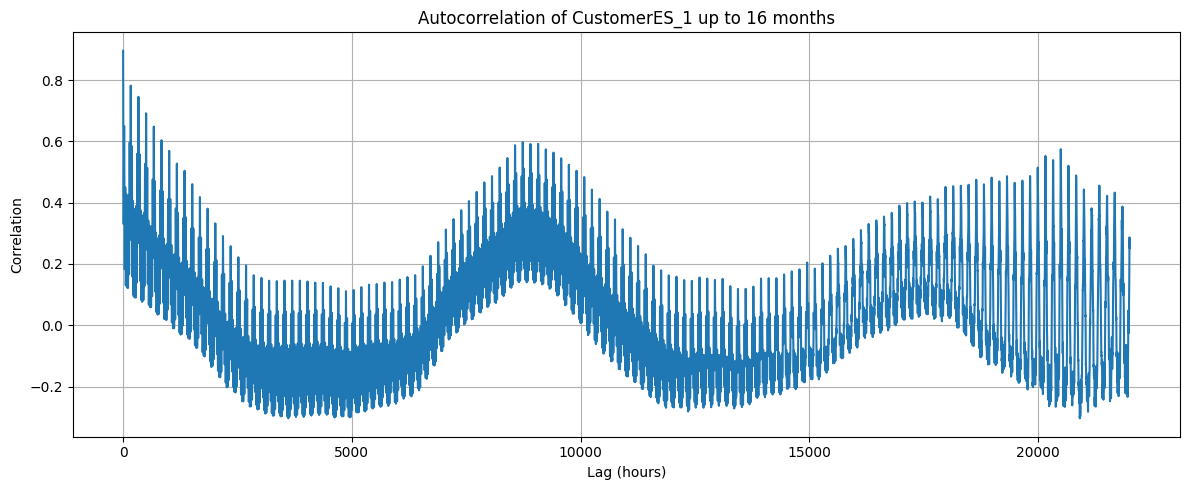

In [33]:
# Optional: aggregate to daily or monthly if you want smoother autocorrelation
# series = series.resample('D').mean()
# or
# series = series.resample('M').mean()

series = df["VALUEMWHMETERINGDATA_customerES_5"].dropna()

max_lag = 22000  # hours
autocorrelations = [series.autocorr(lag) for lag in range(1, max_lag)]

plt.figure(figsize=(12, 5))
plt.plot(range(1, max_lag), autocorrelations)
plt.title("Autocorrelation of CustomerES_1 up to 16 months")
plt.xlabel("Lag (hours)")
plt.ylabel("Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
print(24*365)

8760
